<a href="https://colab.research.google.com/github/moosenichols/cs130-intro/blob/main/Intro_to_line_fitting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Line Fitting for CSCI 130

---
Today, we will take a scatterplot of data and determine how to fit a line to the data.

First, let's import the tools that we will need:

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy


## Fitting

Let's start by making a simple dataset.  We will use the example of an object falling, where the speed =  9.8*time. (The number 9.8 meters per second-squared is how quickly objects accelerate under the influence of gravity.) The object should speed up as it falls. This code should run, but will only give 5 data points.


Text(0, 0.5, 'speed (m/s)')

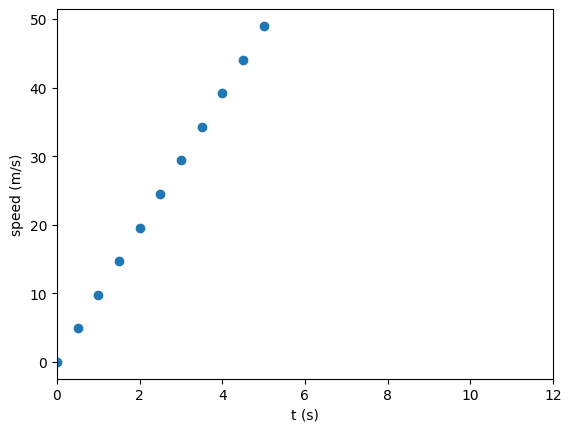

In [6]:
x_data = np.linspace(0, 5, num=11)  #TODO: fix this to give 11 data points instead of 5 data points
y_data = 9.8*x_data   #9.8 is the acceleration in meters per second-squared

plt.figure()
plt.scatter(x_data, y_data)
plt.xlim(xmax = 12.0, xmin = 0)
plt.xlabel("t (s)")
plt.ylabel("speed (m/s)")

This is not realistic; data is never this perfect. Let's try to put in some measurement error. This will only work if you fixed the previous code to have 11 data points.

Text(0, 0.5, 'speed (m/s)')

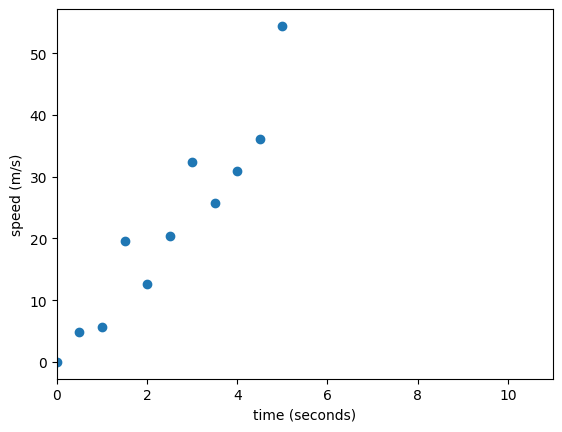

In [5]:
# Seed the random number generator for reproducibility
np.random.seed(2)

#Here we are shifting our values by adding a random number
y_data = 9.8*x_data*(1+np.random.normal(size=11)/5.0)


# And plot it
plt.figure()
plt.scatter(x_data, y_data)
plt.xlim(xmax = 11.0, xmin = 0)
plt.xlabel("time (seconds)")
plt.ylabel("speed (m/s)")


Let's see how we could fit it to a line and extract the best fit parameters.  For fitting in this class, we will start with the "optimize" method from the scipy.

First, we also need to define our function.  Our data looks linear (y=ax+b), so let's try that first and see what we get..

In [ ]:
def linear(x, m, b):
    return m*x+b

Here is the basic use of the "optimize" function:

In [ ]:
params, params_covariance = scipy.optimize.curve_fit(linear, x_data, y_data)
slope = params[0]
intercept = params[1]

# TODO: fix this so it only uses 2 digits after the decimal point
print('y ={:.7f} * x +({:.7f})'.format(slope,intercept)) #equation for a line is y = m x + b


y =9.1837616 * x +(-1.8402254)


We got the best-fit parameters and put them into the equation for a line.  Let's plot the resulting best fit line on the data and see how it looks.

Text(0, 0.5, 'speed (m/s)')

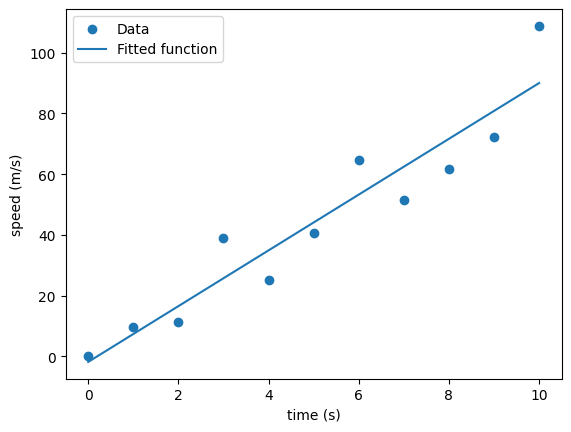

In [ ]:
plt.figure()
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, linear(x_data, slope, intercept),label='Fitted function')

plt.legend(loc='best')
plt.xlabel("time (s)")
plt.ylabel("speed (m/s)")

## EXERCISE:  
In the space below, make a new function where you fix the y-intercept of your function to be zero.  That is, your new function will be a line with only one parameter - the slope (y = mx instead of y = mx + b).  Make this new function, and use it to fit the the data. I've copied the old code below so you can see what things you need to change.

In [ ]:
# TODO: Change the name of this function to linear_no_intercept, and
# change the number of inputs to be only two inputs. Remove the intercept (b).

def linear(x, m, b):
    return m*x+b

In [ ]:
#TODO: change this code to remove the intercept parts.
params, params_covariance = scipy.optimize.curve_fit(linear, x_data, y_data)
slope = params[0]
intercept = params[1]

print('y ={:.2f} * x +({:.2f})'.format(slope,intercept)) #TODO: change this to y = m x

plt.figure()
plt.scatter(x_data, y_data, label='Data')

#change this to use your new function, which has a different name and different number of inputs
plt.plot(x_data, linear(x_data, slope, intercept),label='Fitted function')

plt.legend(loc='best')
plt.xlabel("time (s)")
plt.ylabel("speed (m/s)")

How did the value of the best fit slope change?  It should come closer to the input value of 9.8.

By constraining the function used in the fit based on our knowledge, we got a better model of our data.  This is part of the game when trying to find the best model, and to extract parameters with small uncertainties.

## EXERCISE 2:  
Change the acceleration to be larger than 9.8 meters per second-squared in code chunk #2 (where you have y_data = 9.8*x_data). How do you expect this to change the slope of your line? Re-run your code to see if your prediction is correct.  